# Libraries

In [1]:
import yfinance as yf

In [3]:
import pandas as pd

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import numpy as np

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [13]:
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [16]:
gold_dataset = pd.read_csv('gold_price_with_usdinr_2017_to_25.csv')

In [18]:
gold_dataset.head()

,DATE,CLOSE PRICE,HIGH,LOW,OPEN PRICE,Gold Price (24 Karat),Gold Price (22 Karat),Gold Price (18 Karat),Gold Price (14 Karat),Gold Price (10 Karat)
0,2017-01-02,67.944801,68.239998,67.900002,67.944801,2520.10,2310.09,1890.07,1470.06,1050.04
1,2017-01-03,68.133904,68.430000,68.038002,68.135002,2540.43,2328.72,1905.32,1481.91,1058.51
2,2017-01-04,68.269798,68.279999,67.934502,68.269997,2542.92,2331.01,1907.19,1483.37,1059.55
3,2017-01-05,67.885498,67.990501,67.714996,67.885002,2572.07,2357.73,1929.05,1500.37,1071.69
4,2017-01-06,67.733002,68.101997,67.733498,67.737999,2569.47,2355.34,1927.10,1498.86,1070.61


In [20]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   2113 non-null   object 
 1   CLOSE PRICE            2113 non-null   float64
 2   HIGH                   2113 non-null   float64
 3   LOW                    2113 non-null   float64
 4   OPEN PRICE             2113 non-null   float64
 5   Gold Price (24 Karat)  2113 non-null   float64
 6   Gold Price (22 Karat)  2113 non-null   float64
 7   Gold Price (18 Karat)  2113 non-null   float64
 8   Gold Price (14 Karat)  2113 non-null   float64
 9   Gold Price (10 Karat)  2113 non-null   float64
dtypes: float64(9), object(1)
memory usage: 165.2+ KB


# Exploratory Data Analysis

- Handle missing values = NO
- Handle Imbalanced dataset = NO
- Handle outliers = No
- Encode Categorical features = No
- Noramalization vs Standardisation = standardize

## Checking Outliers

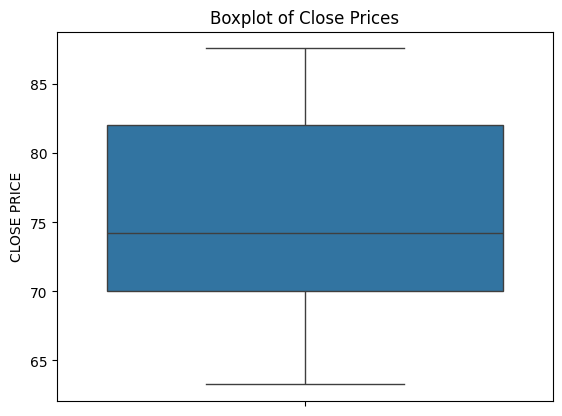

In [25]:
## Assuming 'gold_dataset' is a pandas DataFrame and 'CLOSE PRICE' is a column in it
sns.boxplot(gold_dataset['CLOSE PRICE'])
plt.title('Boxplot of Close Prices')
plt.show()

In [27]:
from scipy.stats import zscore

# Calculate Z-scores
gold_dataset['Z-score'] = zscore(gold_dataset['CLOSE PRICE'])

# Identify outliers based on Z-scores > 3 or < -3
outliers_z = gold_dataset[gold_dataset['Z-score'].abs() > 3]

# Print outliers
print(outliers_z)

Empty DataFrame
Columns: [DATE, CLOSE PRICE, HIGH, LOW, OPEN PRICE, Gold Price (24 Karat), Gold Price (22 Karat), Gold Price (18 Karat), Gold Price (14 Karat), Gold Price (10 Karat), Z-score]
Index: []


In [29]:
# Check for extreme values manually (e.g., prices less than 0, if that's not expected)
outliers_manual = gold_dataset[gold_dataset['CLOSE PRICE'] < 0]
print(outliers_manual)

Empty DataFrame
Columns: [DATE, CLOSE PRICE, HIGH, LOW, OPEN PRICE, Gold Price (24 Karat), Gold Price (22 Karat), Gold Price (18 Karat), Gold Price (14 Karat), Gold Price (10 Karat), Z-score]
Index: []


## .

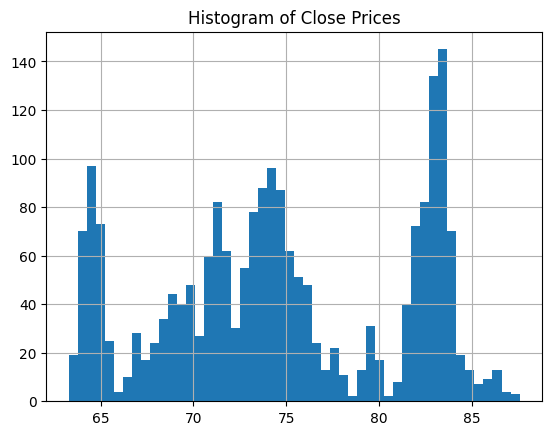

In [32]:
gold_dataset['CLOSE PRICE'].hist(bins=50)
plt.title('Histogram of Close Prices')
plt.show()

# Regression Model

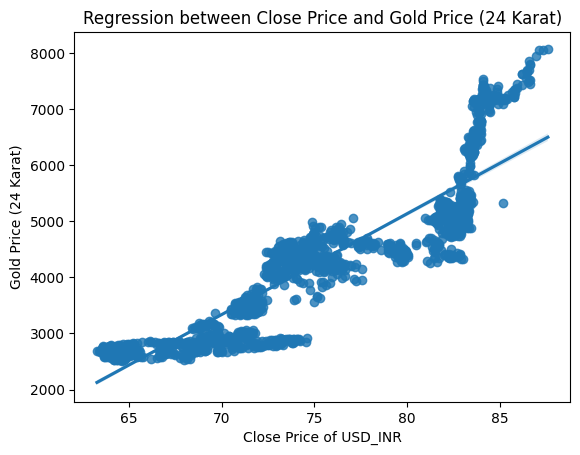

In [35]:
# Create the regression plot
sns.regplot(x='CLOSE PRICE', y='Gold Price (24 Karat)', data=gold_dataset)

# Add title and labels
plt.title('Regression between Close Price and Gold Price (24 Karat)')
plt.xlabel('Close Price of USD_INR')
plt.ylabel('Gold Price (24 Karat)')

# Show the plot
plt.show()

# Model Training

In [38]:
X = gold_dataset[['CLOSE PRICE']]
y = gold_dataset[['Gold Price (24 Karat)']]

In [40]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

In [44]:
X_train.shape, X_test.shape

((1901, 1), (212, 1))

In [46]:
scalar = StandardScaler()

In [48]:
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [50]:
# Create the linear regression model with positive coefficients constraint
regressor = LinearRegression(positive=True)

In [52]:
regressor.fit(X_train_scaled, y_train)

LinearRegression(positive=True)

In [54]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}

In [56]:
regressor.coef_

array([[1184.25924767]])

In [58]:
regressor.intercept_

array([4198.65396107])

In [60]:
# y = mx + b
m = regressor.coef_[0][0]
b = regressor.intercept_[0]

In [62]:
m,b 

(1184.259247674344, 4198.653961073119)

In [64]:
X_train_predict = regressor.predict(X_train_scaled)

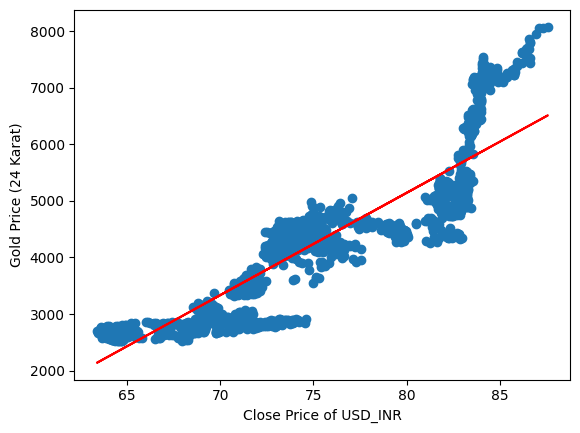

In [66]:
plt.scatter(X_train, y_train)
plt.plot(X_train, X_train_predict, color='r')
plt.xlabel('Close Price of USD_INR')
plt.ylabel('Gold Price (24 Karat)')

# Show the plot
plt.show()

In [68]:
X_test_predict = regressor.predict(X_test_scaled)

In [70]:
X_test_predict

array([[5812.22063699],
       [3945.7458634 ],
       [3534.92054508],
       [3887.67781442],
       [4176.71804894],
       [5106.65239026],
       [6021.17114223],
       [3905.11503009],
       [3648.61912356],
       [5020.71399134],
       [4206.39243872],
       [5750.43433795],
       [4101.71819086],
       [5873.1228188 ],
       [3897.42513811],
       [3285.82671043],
       [4388.3030032 ],
       [5119.43215344],
       [5742.5282366 ],
       [3766.05523191],
       [5810.48820789],
       [3294.94193161],
       [4075.49213373],
       [3570.33618839],
       [5577.74641075],
       [5515.87059827],
       [4107.11516197],
       [3842.66082316],
       [5718.91872582],
       [4951.99659875],
       [3337.26938865],
       [5710.54302326],
       [3977.15405941],
       [2830.10971965],
       [3099.00530159],
       [2555.6918478 ],
       [2977.16650973],
       [4202.27757531],
       [2237.44613615],
       [5730.27178268],
       [4030.40215461],
       [3486.185

In [72]:
y_test

,Gold Price (24 Karat)
2018,7099.27
1108,4074.51
715,3431.58
1217,4288.75
1000,4543.77
...,...
110,2649.60
464,2909.89
1329,4385.16
1500,4504.59


In [74]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, X_test_predict)

239747.68588412055

# Hyperparameter Optimization

In [77]:
# Hyperparameter Tunning

from sklearn.model_selection import RandomizedSearchCV

param_space = {'copy_X': [True, False],
               'fit_intercept': [True, False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True, False]}

In [79]:
search = RandomizedSearchCV(regressor, param_space, n_iter=50, cv=5)

In [81]:
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(positive=True), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [83]:
search.best_params_

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [85]:
# {'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
tunned_model = LinearRegression(positive=True, n_jobs=1, fit_intercept=True, copy_X=True)

In [87]:
tunned_model.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=1, positive=True)

In [89]:
# y = mx + b
m = tunned_model.coef_[0][0]
b = tunned_model.intercept_[0]

In [91]:
m,b

(1184.259247674344, 4198.653961073119)

# MLOPS

- Save the model
- Build interface
- Connect Model & Interface

In [95]:
import pickle

In [97]:
pickle.dump(regressor, open('regressor.pkl', 'wb'))

In [99]:
regressor_reloaded = pickle.load(open('regressor.pkl', 'rb'))

In [101]:
regressor_reloaded.coef_

array([[1184.25924767]])

In [103]:
pickle.dump(scalar, open('scaler.pkl', 'wb'))

In [113]:
def calculate_gold_rate(usd_inr):
    scaled_input = scalar.transform(np.array(usd_inr).reshape(1,-1))
    return regressor.predict(scaled_input)[0][0].round(2)
    # print(scaled_input)

In [115]:
calculate_gold_rate(80)

5141.4